In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 20
pd.options.display.max_rows = 30
pd.options.mode.copy_on_write = True

In [2]:
import requests
import pandas as pd

# Define the URL for the API
url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync"

# Define the SQL query to retrieve the required data
query = """
SELECT 
    pl_name, 
    hostname, 
    pl_orbsmax, 
    pl_orbsmaxerr1, 
    pl_orbsmaxerr2, 
    pl_bmasse, 
    pl_bmasseerr1, 
    pl_bmasseerr2, 
    sy_pnum, 
    pl_orbeccen, 
    pl_orbeccenerr1, 
    pl_orbeccenerr2, 
    pl_orbincl, 
    pl_orbinclerr1, 
    pl_orbinclerr2
FROM ps
WHERE 
    default_flag = 1 AND
    sy_pnum > 1
"""

# Define the parameters for the request
params = {
    "query": query,
    "format": "json",
}

# Make the request to the API
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Convert the JSON data to a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Display the DataFrame
    # print(df)
else:
    print(f"Error: {response.status_code}")

In [3]:
rm_hostnames = []

for hostname in df["hostname"].unique():
    df_host = df[df["hostname"] == hostname]
    # if df_host contains NaN values, save hostname to a list
    if df_host.isnull().values.any():
        # print(df_host)
        rm_hostnames.append(hostname)

# len(rm_hostnames)
df_clean = df[~df["hostname"].isin(rm_hostnames)]

In [4]:
len(df_clean["hostname"].unique())

38

In [5]:
df_clean["hostname"].unique()

array(['HD 23472', 'TOI-2525', 'K2-199', 'TOI-836', 'TOI-1064',
       'TOI-1130', 'KOI-94', 'TOI-776', 'TOI-421', 'TOI-125', 'TOI-270',
       'K2-138', 'TOI-2202', 'Kepler-138', 'HD 62364', 'WASP-148',
       'HD 106315', 'HD 73267', 'HD 260655', 'Kepler-411', 'HD 206893',
       'iot Dra', 'HD 111232', 'HD 30177', 'HD 72659', '14 Her',
       'bet Pic', 'HD 66428', 'HD 73583', 'HD 15337', 'Kepler-419',
       'PDS 70', 'K2-32', 'Kepler-47', 'Kepler-79', 'Kepler-87',
       'Kepler-117', 'EPIC 249893012'], dtype=object)

In [6]:
# df_clean[df_clean["hostname"] == "HD 72659"]

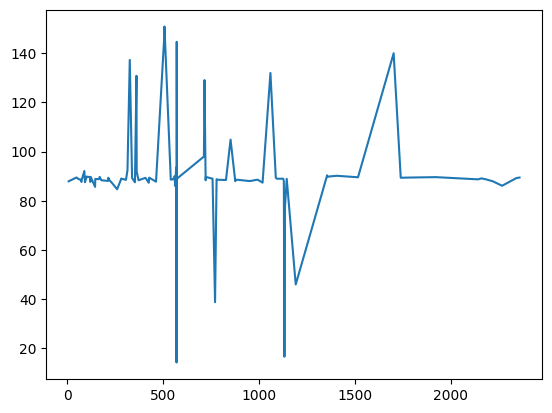

In [7]:
plt.plot(df_clean["pl_orbincl"])

In [8]:
# sort the DataFrame by the hostname
df_clean = df_clean.sort_values(by="hostname")

In [9]:
maxmass_plnames = []

for hostname in df_clean["hostname"].unique():
    df_host = df_clean[df_clean["hostname"] == hostname]
    
    # take the planet with maximum mass
    maxmass_pl = df_host["pl_bmasse"].idxmax()
    maxmass_plnames.append(hostname)

    df_clean.loc[df_host.index, "pl_relincl"] = \
        df_host.loc[maxmass_pl, "pl_orbincl"] - df_host["pl_orbincl"]
    
    df_clean.loc[df_host.index, "pl_relinclerr1"] = \
        np.sqrt(df_host.loc[maxmass_pl, "pl_orbinclerr1"]**2 + df_host["pl_orbinclerr1"]**2)
    
    df_clean.loc[df_host.index, "pl_relinclerr2"] = \
        np.sqrt(df_host.loc[maxmass_pl, "pl_orbinclerr2"]**2 + df_host["pl_orbinclerr2"]**2)

In [10]:
df_clean

,pl_name,hostname,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,sy_pnum,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_relincl,pl_relinclerr1,pl_relinclerr2
570,14 Her b,14 Her,2.77400,0.10900,-0.1200,2559.47216,518.69596,-280.64248,2,0.373,0.0080,-0.0060,144.652,6.279,-3.241,0.000,8.879847,4.583466
715,HD 145675 c,14 Her,11.92400,1.29600,-1.1530,1597.08775,277.46420,-339.12291,2,0.393,0.0450,-0.0480,129.097,6.255,-29.051,15.555,8.862893,29.231228
2359,EPIC 249893012 d,EPIC 249893012,0.22000,0.02000,-0.0400,10.18000,2.46000,-2.42000,3,0.150,0.2100,-0.1100,89.470,0.360,-0.500,-1.530,0.822922,1.162970
2268,EPIC 249893012 b,EPIC 249893012,0.04700,0.00500,-0.0070,8.75000,1.09000,-1.08000,3,0.060,0.0800,-0.0400,86.140,2.600,-3.500,1.800,2.703257,3.654107
2220,EPIC 249893012 c,EPIC 249893012,0.13000,0.01000,-0.0200,14.67000,1.84000,-1.89000,3,0.070,0.0800,-0.0500,87.940,0.740,-1.050,0.000,1.046518,1.484924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,WASP-148 b,WASP-148,0.08215,0.00086,-0.0015,91.21675,6.99222,-5.08525,2,0.208,0.0200,-0.0250,89.300,0.240,-0.240,15.600,4.606257,7.303944
1144,bet Pic c,bet Pic,2.68000,0.01600,-0.0150,3222.46222,373.44838,-327.68109,2,0.314,0.0240,-0.0340,88.947,0.083,-0.091,0.062,0.083863,0.091788
571,bet Pic b,bet Pic,10.01800,0.08200,-0.0760,3727.80939,742.76499,-678.56365,2,0.106,0.0070,-0.0060,89.009,0.012,-0.012,0.000,0.016971,0.016971
1191,iot Dra b,iot Dra,1.45300,0.02600,-0.0260,3756.73177,133.48793,-130.30965,2,0.701,0.0016,-0.0017,46.000,27.000,-19.000,40.000,33.015148,26.870058


In [11]:
def amd(m: np.array, e: np.array, i: np.array, a: np.array) -> np.array:
    return m * np.sqrt(a) * (1 - np.sqrt(1 - e**2) * np.cos(np.deg2rad(i)))

def namd(amd: np.array, m: np.array, a: np.array) -> float:
    return np.sum(amd) / np.sum(m * np.sqrt(a))

In [12]:
for hostname in df_clean["hostname"].unique():
    df_host = df_clean[df_clean["hostname"] == hostname]
    
    # calculate the AMD
    amd_val = amd(
        df_host["pl_bmasse"], 
        df_host["pl_orbeccen"], 
        df_host["pl_relincl"], 
        df_host["pl_orbsmax"])
    
    df_clean.loc[df_host.index, "amd"] = amd_val

    # calculate the NAMD
    namd_val = namd(amd_val, df_host["pl_bmasse"], df_host["pl_orbsmax"])

    df_clean.loc[df_host.index, "namd"] = namd_val

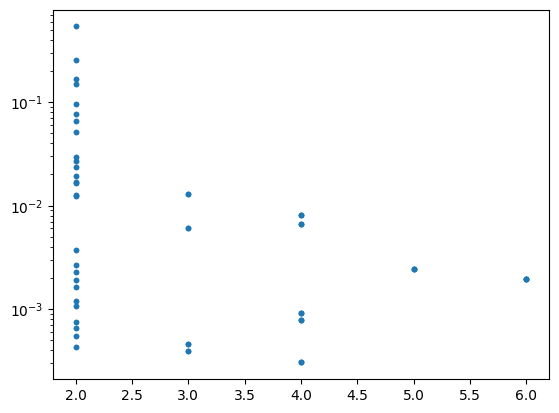

In [13]:
plt.plot(df_clean["sy_pnum"], df_clean["namd"], '.')
plt.yscale("log")

In [14]:
df_clean.hostname.unique()

array(['14 Her', 'EPIC 249893012', 'HD 106315', 'HD 111232', 'HD 15337',
       'HD 206893', 'HD 23472', 'HD 260655', 'HD 30177', 'HD 62364',
       'HD 66428', 'HD 72659', 'HD 73267', 'HD 73583', 'K2-138', 'K2-199',
       'K2-32', 'KOI-94', 'Kepler-117', 'Kepler-138', 'Kepler-411',
       'Kepler-419', 'Kepler-47', 'Kepler-79', 'Kepler-87', 'PDS 70',
       'TOI-1064', 'TOI-1130', 'TOI-125', 'TOI-2202', 'TOI-2525',
       'TOI-270', 'TOI-421', 'TOI-776', 'TOI-836', 'WASP-148', 'bet Pic',
       'iot Dra'], dtype=object)

In [15]:
userid = "14 Her"
user_df = df_clean[df_clean["hostname"] == userid]

In [16]:
user_df

,pl_name,hostname,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,sy_pnum,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_relincl,pl_relinclerr1,pl_relinclerr2,amd,namd
570,14 Her b,14 Her,2.774,0.109,-0.120,2559.47216,518.69596,-280.64248,2,0.373,0.008,-0.006,144.652,6.279,-3.241,0.000,8.879847,4.583466,307.646703,0.095842
715,HD 145675 c,14 Her,11.924,1.296,-1.153,1597.08775,277.46420,-339.12291,2,0.393,0.045,-0.048,129.097,6.255,-29.051,15.555,8.862893,29.231228,629.479407,0.095842


In [17]:
Npt = 10000

pl_df_mcmc_samples = pd.DataFrame(columns=np.array([[f"pl_bmasse_{pl_name}", f"pl_orbsmax_{pl_name}", f"pl_orbeccen_{pl_name}", f"pl_relincl_{pl_name}"] for pl_name in user_df["pl_name"]]).flatten(), index=range(Npt))

for pl_name in user_df["pl_name"]:
    pl_df = user_df[user_df["pl_name"] == pl_name]
    
    pl_df_mcmc_samples[f"pl_bmasse_{pl_name}"] = np.random.normal(
        loc=pl_df["pl_bmasse"],
        scale=0.5 * (pl_df["pl_bmasseerr1"]-pl_df["pl_bmasseerr2"]),
        size=Npt)
    
    pl_df_mcmc_samples[f"pl_orbsmax_{pl_name}"] = np.random.normal(
        loc=pl_df["pl_orbsmax"],
        scale=0.5 * (pl_df["pl_orbsmaxerr1"]-pl_df["pl_orbsmaxerr2"]),
        size=Npt)

    pl_df_mcmc_samples[f"pl_orbeccen_{pl_name}"] = np.random.normal(
        loc=pl_df["pl_orbeccen"],
        scale=0.5 * (pl_df["pl_orbeccenerr1"]-pl_df["pl_orbeccenerr2"]),
        size=Npt)

    pl_df_mcmc_samples[f"pl_relincl_{pl_name}"] = np.random.normal(
        loc=pl_df["pl_relincl"],
        scale=0.5 * (pl_df["pl_orbinclerr1"]-pl_df["pl_orbinclerr2"]),
        size=Npt)

    pl_df_mcmc_samples[f"good_idx_{pl_name}"] = (
        (pl_df_mcmc_samples[f"pl_orbeccen_{pl_name}"] >= 0) & (pl_df_mcmc_samples[f"pl_orbeccen_{pl_name}"] <= 1) &
        (pl_df_mcmc_samples[f"pl_relincl_{pl_name}"] >= 0) & (pl_df_mcmc_samples[f"pl_relincl_{pl_name}"] <= 180) &
        (pl_df_mcmc_samples[f"pl_orbsmax_{pl_name}"] >= 0) &
        (pl_df_mcmc_samples[f"pl_bmasse_{pl_name}"] >= 0)
        )
    
    pl_df_mcmc_samples[f"amd_{pl_name}"] = amd(
        pl_df_mcmc_samples[f"pl_bmasse_{pl_name}"], 
        pl_df_mcmc_samples[f"pl_orbeccen_{pl_name}"], 
        pl_df_mcmc_samples[f"pl_relincl_{pl_name}"], 
        pl_df_mcmc_samples[f"pl_orbsmax_{pl_name}"])
    
# keep rows of pl_df_mcmc_samples where good_idx is True for all planets
pl_df_mcmc_samples = pl_df_mcmc_samples[pl_df_mcmc_samples.filter(like="good_idx").all(axis=1)]

In [18]:
# for each row, sum the AMDs of all planets and store the result in a new column called "namd_num"
pl_df_mcmc_samples["namd_num"] = pl_df_mcmc_samples.filter(like="amd").sum(axis=1)

In [19]:
# for each row, compute the sum of: (mass of each planet * sqrt(semi-major axis of each planet))
pl_df_mcmc_samples["namd_den"] = np.sum([pl_df_mcmc_samples[f"pl_bmasse_{pl_name}"] * np.sqrt(pl_df_mcmc_samples[f"pl_orbsmax_{pl_name}"]) for pl_name in user_df["pl_name"]], axis=0)

In [20]:
pl_df_mcmc_samples["namd"] = pl_df_mcmc_samples["namd_num"] / pl_df_mcmc_samples["namd_den"]

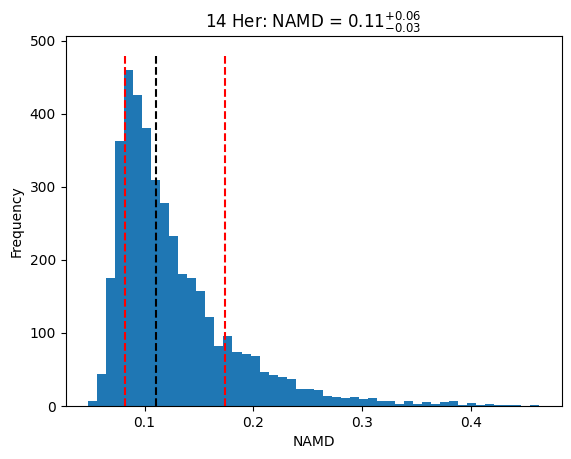

In [21]:
plt.hist(pl_df_mcmc_samples["namd"], bins=50)
quantiles = pl_df_mcmc_samples["namd"].quantile([0.16, 0.5, 0.84])
plt.vlines(quantiles, 0, plt.ylim()[1], color=["red", "black", "red"], linestyles="dashed")
plt.xlabel("NAMD")
plt.ylabel("Frequency")
title = f"{userid}: " + f"NAMD = ${quantiles[0.5]:.2f}^{{+{quantiles[0.84]-quantiles[0.5]:.2f}}}_{{-{quantiles[0.5]-quantiles[0.16]:.2f}}}$"
plt.title(title)
plt.show()